In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('CC_GENERAL.csv')

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [6]:
# profile_report=ProfileReport(data)

In [7]:
# profile_report.to_file('profile_report.html')

## Check for Missing Values

In [8]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
miss_cols=list(data.columns[data.isna().sum()>0])

In [10]:
miss_cols

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [11]:
for i in miss_cols:
    data[i].fillna(data[i].median(),inplace=True)

In [12]:
data.columns[data.isna().sum()>0]

Index([], dtype='object')

In [13]:
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Check for Duplicate rows

In [14]:
data.duplicated().sum()

0

## Deriving KPIs

### 1. Monthly Average Purchase and Cash Advance Amount

In [15]:
data['Monthly_avg_purchase']=data['PURCHASES']/data['TENURE']
data['Monthly_cash_advance']=data['CASH_ADVANCE']/data['TENURE']

In [16]:
data['Monthly_avg_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

In [17]:
data['Monthly_cash_advance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

### 2. Purchases by type (one-off, installments)

In [18]:
data['ONEOFF_PURCHASES'].value_counts().head()

0.00      4302
45.65       46
50.00       17
200.00      15
100.00      13
Name: ONEOFF_PURCHASES, dtype: int64

In [19]:
data['INSTALLMENTS_PURCHASES'].value_counts().head()

0.0      3916
300.0      14
100.0      14
200.0      14
150.0      12
Name: INSTALLMENTS_PURCHASES, dtype: int64

In [20]:
data[(data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [21]:
data[(data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

In [22]:
data[(data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [23]:
data[(data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [24]:
#Almost all 4 categories have similar number of observations as well to distinguish the customer behavior

In [25]:
def purchase(data):   
    if (data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']>0):
        return 'installment'
    if (data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'

In [26]:
data['purchase_type']=data.apply(lambda x : purchase(x),axis=1)

In [27]:
data['purchase_type'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

### 3. Average Amount Per Purchase and Cash Advance Transaction

In [28]:
# Average amount per cash-advance transaction
data['CASH_ADVANCE_TRX'].value_counts()

0      4628
1       887
2       620
3       436
4       384
       ... 
49        1
107       1
93        1
69        1
71        1
Name: CASH_ADVANCE_TRX, Length: 65, dtype: int64

In [29]:
#: Average amount per purchase transaction
data['PURCHASES_TRX'].value_counts()

0      2044
1       667
12      570
2       379
6       352
       ... 
148       1
204       1
308       1
133       1
199       1
Name: PURCHASES_TRX, Length: 173, dtype: int64

### 4. Limit usage (balance to credit limit ratio)

In [30]:
#low value of limit usage means person is having good credit score
data['limit_usage']=data.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [31]:
data['limit_usage']

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8945    0.028494
8946    0.019183
8947    0.023399
8948    0.026915
8949    0.310590
Name: limit_usage, Length: 8950, dtype: float64

### 5. Payments to minimum payments ratio

In [32]:
data['payment_min_pay']=data.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [33]:
data['payment_min_pay'].head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: payment_min_pay, dtype: float64

In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


### Insights

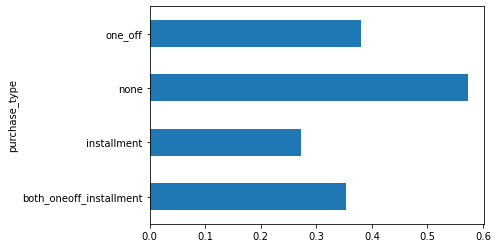

In [35]:
(data.groupby('purchase_type')['limit_usage'].mean()).plot.barh()
plt.show()

##### Insight 1 : Customers with Installments are having good credit score

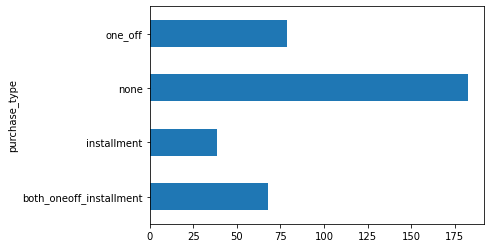

In [36]:
(data.groupby('purchase_type')['Monthly_cash_advance'].mean()).plot.barh()
plt.show()

##### Insight 2: Customers who don't do either one-off or installment purchases take more cash on advance

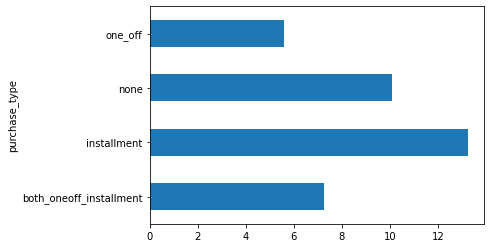

In [37]:
(data.groupby('purchase_type')['payment_min_pay'].mean()).plot.barh()
plt.show()

##### Insight 3: Customers with installment payments are paying dues

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Getting Dummies for Categorical Variables

In [39]:
pur_type_dummies=pd.get_dummies(data['purchase_type'],prefix='purchase')

In [40]:
pur_type_dummies.head()

,purchase_both_oneoff_installment,purchase_installment,purchase_none,purchase_one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


### Outlier Treatment for Continious Variables

In [41]:
data.dtypes[data.dtypes!='object'].index

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_min_pay'],
      dtype='object')

In [42]:
cont_vars=list(data.dtypes[data.dtypes!='object'].index)

In [43]:
len(cont_vars)

21

In [44]:
def outlier(x):
    for i in x:
        data[i].clip(lower=data[i].quantile(0.05),upper=data[i].quantile(0.95),inplace=True)

In [45]:
outlier(cont_vars)

In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1452.399593,1688.929294,8.814518,128.281915,873.385231,2054.140036,5909.111808
BALANCE_FREQUENCY,8950.0,0.883252,0.218438,0.272727,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.0,823.863022,1099.813081,0.000000,39.635000,361.280000,1110.130000,3998.619500
ONEOFF_PURCHASES,8950.0,447.948730,746.133555,0.000000,0.000000,38.000000,577.405000,2671.094000
INSTALLMENTS_PURCHASES,8950.0,336.336040,497.830168,0.000000,0.000000,89.000000,468.637500,1750.087500
CASH_ADVANCE,8950.0,817.161146,1349.178282,0.000000,0.000000,0.000000,1113.821139,4647.169122
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.127637,0.176670,0.000000,0.000000,0.000000,0.222222,0.583333


In [47]:
#Combining the data(Excluding 'CUST_ID' because it is not needed for the analysis but it will be important in later stage for defining strategies)
data_final=pd.concat([data.drop(columns=['CUST_ID','purchase_type']),pur_type_dummies],axis=1)

In [48]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [49]:
#dropping feature that are used for creating our new KPIs.
cols=['BALANCE', 'PURCHASES' ,'PAYMENTS' ,'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'CASH_ADVANCE' ,'CREDIT_LIMIT']
data_final.drop(columns=cols,inplace=True)

In [50]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   int64  
 8   PURCHASES_TRX                     8950 non-null   int64  
 9   Monthly_avg_purchase              8950 non-null   float64
 10  Monthly_cash_advance              8950 non-null   float64
 11  limit_usage                       8950 non-null   float64
 12  paymen

Before applying PCA or K means, we have to standardize the featues.

### Standardizing the features

In [51]:
standard=StandardScaler()

In [52]:
data_final_standard=standard.fit_transform(data_final)

In [53]:
data_final_standard=pd.DataFrame(data_final_standard,columns=data_final.columns)

In [54]:
data_final_standard.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE_FREQUENCY,8950.0,-6.455196e-15,1.000056,-2.795108,0.025807,0.534496,0.534496,0.534496
ONEOFF_PURCHASES,8950.0,1.072175e-14,1.000056,-0.600394,-0.600394,-0.549461,0.173513,2.979721
INSTALLMENTS_PURCHASES,8950.0,-4.120131e-15,1.000056,-0.675642,-0.675642,-0.496856,0.265771,2.839985
PURCHASES_FREQUENCY,8950.0,-3.716084e-16,1.000056,-1.221758,-1.014125,0.024043,1.062211,1.269843
ONEOFF_PURCHASES_FREQUENCY,8950.0,2.021052e-15,1.000056,-0.678661,-0.678661,-0.399319,0.326973,2.673451
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,2.353921e-16,1.000056,-0.916995,-0.916995,-0.497629,0.970151,1.599199
CASH_ADVANCE_FREQUENCY,8950.0,9.360607e-16,1.000056,-0.722502,-0.722502,-0.722502,0.535404,2.579503
CASH_ADVANCE_TRX,8950.0,-1.490087e-15,1.000056,-0.636381,-0.636381,-0.636381,0.295454,2.858000
PURCHASES_TRX,8950.0,-2.098495e-15,1.000056,-0.807798,-0.744112,-0.361994,0.274869,2.822320
Monthly_avg_purchase,8950.0,-3.022412e-15,1.000056,-0.757187,-0.720950,-0.416743,0.279263,2.859205


### Applying PCA

In [55]:
pca=PCA(n_components=len(data_final_standard.columns))

In [56]:
pca.fit(data_final_standard)

PCA(n_components=17)

In [57]:
np.cumsum(pca.explained_variance_ratio_)

array([0.34951469, 0.52978187, 0.66107648, 0.74585675, 0.81296396,
       0.85534579, 0.88717528, 0.91523008, 0.93653315, 0.95498938,
       0.9721561 , 0.9831112 , 0.99149988, 0.99625964, 0.99862256,
       1.        , 1.        ])

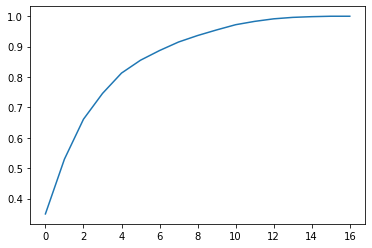

In [58]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

### Since 5 components are explaining about 82% of the Variance, therefore we can take 5 components to make our PCA

In [59]:
pca_final=PCA(n_components=5)

In [60]:
pca_final=pca_final.fit(data_final_standard)

In [61]:
np.cumsum(pca_final.explained_variance_ratio_)

array([0.34951469, 0.52978187, 0.66107648, 0.74585675, 0.81296396])

In [62]:
loadings = pd.DataFrame(pca_final.components_.T, columns=['PC1', 'PC2','PC3','PC4','PC5'],index=data_final_standard.columns)

In [63]:
loadings

,PC1,PC2,PC3,PC4,PC5
BALANCE_FREQUENCY,0.064222,0.266449,-0.209289,-0.467027,-0.071475
ONEOFF_PURCHASES,0.274728,0.242330,0.290443,-0.000270,0.008282
INSTALLMENTS_PURCHASES,0.308605,0.041019,-0.247642,0.131694,-0.027410
PURCHASES_FREQUENCY,0.353694,-0.034451,-0.189791,-0.083543,0.202945
ONEOFF_PURCHASES_FREQUENCY,0.266037,0.229366,0.300185,-0.105701,0.047663
PURCHASES_INSTALLMENTS_FREQUENCY,0.305121,-0.086448,-0.386953,0.025582,0.070812
CASH_ADVANCE_FREQUENCY,-0.191932,0.413190,-0.168363,0.159549,0.228415
CASH_ADVANCE_TRX,-0.172599,0.411538,-0.175633,0.185155,0.285415
PURCHASES_TRX,0.357778,0.150316,-0.067526,0.001533,0.002829
Monthly_avg_purchase,0.344054,0.192576,0.094624,0.067961,0.010370


In [64]:
#exporting it into excel and formatting to get 
#loadings.to_excel('factor_loadings.xlsx')

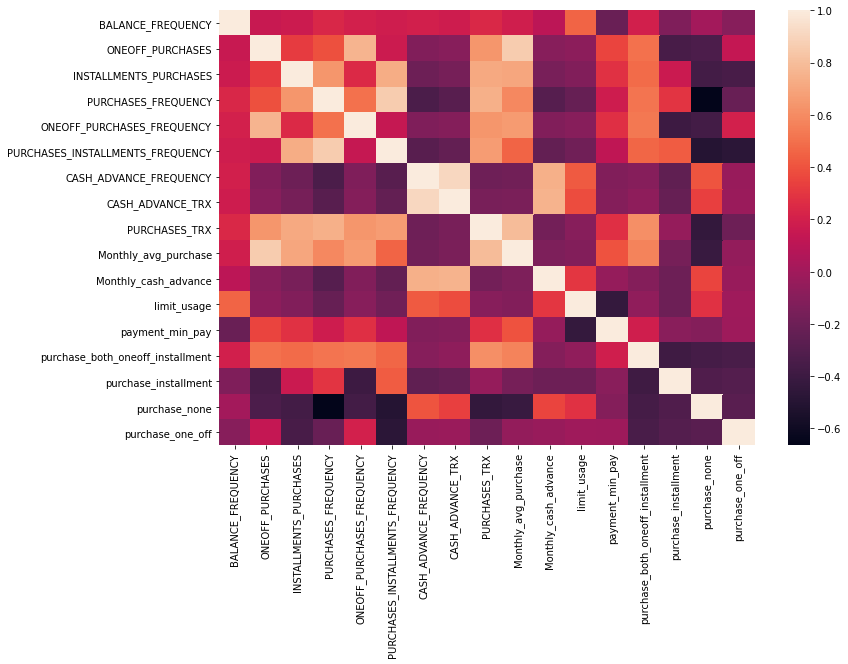

In [65]:
plt.figure(figsize=(12,8))
sns.heatmap(data_final_standard.corr())
plt.show()

In [66]:
corr_matrix=data_final_standard.corr()

In [67]:
#corr_matrix.to_excel('correlation.xlsx')

#### Analyzing Factor Loading Matrix and Correlation Matrix, we could select few features from each of the PC variables. 

1. PC1 : 'PURCHASES_FREQUENCY','Monthly_avg_purchase','INSTALLMENTS_PURCHASES'
2. PC2 : 'CASH_ADVANCE_FREQUENCY','Monthly_cash_advance'
3. PC3 : 'purchase_one_off','purchase_installment'
4. PC4 : 'BALANCE_FREQUENCY','limit_usage','payment_min_pay'
5. PC5 : 'purchase_both_oneoff_installment','purchase_none'

In [68]:
data_final_standard=data_final_standard[['PURCHASES_FREQUENCY','Monthly_avg_purchase','INSTALLMENTS_PURCHASES','CASH_ADVANCE_FREQUENCY','Monthly_cash_advance','purchase_one_off','purchase_installment','BALANCE_FREQUENCY','limit_usage','payment_min_pay','purchase_both_oneoff_installment','purchase_none']]

In [69]:
data_final_standard.head()

,PURCHASES_FREQUENCY,Monthly_avg_purchase,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,Monthly_cash_advance,purchase_one_off,purchase_installment,BALANCE_FREQUENCY,limit_usage,payment_min_pay,purchase_both_oneoff_installment,purchase_none
0,-0.806490,-0.672440,-0.483999,-0.722502,-0.600126,-0.514625,1.720516,-0.297904,-0.989849,-0.564231,-0.670193,-0.543690
1,-1.221758,-0.757187,-0.675642,0.692644,2.868023,-0.514625,-0.581221,0.118296,0.212228,-0.137137,-0.670193,1.839282
2,1.269843,-0.070357,-0.675642,-0.722502,-0.600126,1.943162,-0.581221,0.534496,-0.147906,-0.645860,-0.670193,-0.543690
3,-1.014125,0.574420,-0.675642,-0.250789,-0.460364,1.943162,-0.581221,-1.130304,-0.466647,-0.774059,-0.670193,-0.543690
4,-1.014125,-0.742974,-0.675642,-0.722502,-0.600126,1.943162,-0.581221,0.534496,0.858384,-0.326509,-0.670193,-0.543690


In [70]:
data_final_standard.shape

(8950, 12)

## Clustering

### Finding the best value of K.
#### 1. Elbow Method

In [71]:
cluster_error=[]
for i in range(3,12):
    km=KMeans(n_clusters=i)
    km=km.fit(data_final_standard)
    cluster_error.append(km.inertia_)

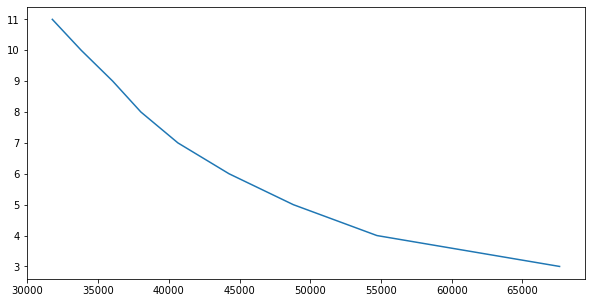

In [72]:
plt.figure(figsize=(10,5))
sns.lineplot(x=np.array(cluster_error),y=np.array(range(3,12)))
plt.show()

#### 2. Silhouette Score

In [73]:
sc_score=[]
for i in range(3,12):
    km=KMeans(n_clusters=i)
    km=km.fit(data_final_standard)
    sc_score.append(metrics.silhouette_score(data_final_standard,km.labels_))

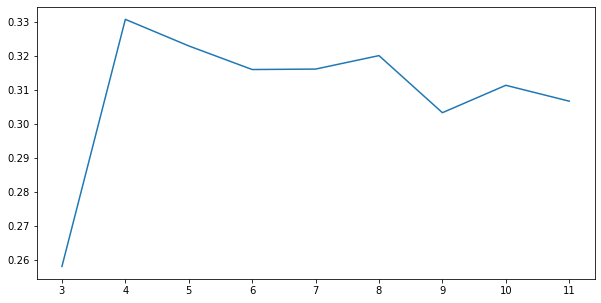

In [74]:
plt.figure(figsize=(10,5))
sns.lineplot(x=np.array(range(3,12)),y=np.array(sc_score))
plt.show()

### Solution:
###   From the above 2 methods, K should be equal to 4 for the given data.

## Final Segmentation (k = 4)

In [75]:
kmc=KMeans(n_clusters=4)

In [76]:
kmc=kmc.fit(data_final_standard)

In [77]:
labels=kmc.labels_
labels

array([3, 2, 1, ..., 3, 2, 1])

In [78]:
metrics.silhouette_score(data_final_standard,labels)

0.3308084828409915

In [79]:
kmc.inertia_

54713.40877670329

## Clusters Profilling Analysis

In [80]:
data_profiling=data_final.copy()

In [81]:
data_profiling

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_min_pay,purchase_both_oneoff_installment,purchase_installment,purchase_none,purchase_one_off
0,0.818182,0.00,95.40,0.166667,0.000000,0.083333,0.000000,0,2,7.950000,0.000000,0.040901,1.446508,0,1,0,0
1,0.909091,0.00,0.00,0.000000,0.000000,0.000000,0.250000,4,0,0.000000,425.548562,0.457495,3.826241,0,0,1,0
2,1.000000,773.17,0.00,1.000000,1.000000,0.000000,0.000000,0,12,64.430833,0.000000,0.332687,0.991682,0,0,0,1
3,0.636364,1499.00,0.00,0.083333,0.083333,0.000000,0.083333,1,1,124.916667,17.149001,0.222223,0.277366,0,0,0,1
4,1.000000,16.00,0.00,0.083333,0.083333,0.000000,0.000000,0,1,1.333333,0.000000,0.681429,2.771075,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,1.000000,0.00,291.12,1.000000,0.000000,0.833333,0.000000,0,6,48.520000,0.000000,0.028494,6.660231,0,1,0,0
8946,1.000000,0.00,300.00,1.000000,0.000000,0.833333,0.000000,0,6,50.000000,0.000000,0.019183,0.883197,0,1,0,0
8947,0.833333,0.00,144.40,0.833333,0.000000,0.666667,0.000000,0,5,24.066667,0.000000,0.023399,0.986076,0,1,0,0
8948,0.833333,0.00,0.00,0.000000,0.000000,0.000000,0.166667,2,0,0.000000,6.093130,0.026915,0.942505,0,0,1,0


In [82]:
data_profiling['cluster_labels']=labels

In [83]:
data['cluster_labels']=labels

In [84]:
data_profiling.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_min_pay,purchase_both_oneoff_installment,purchase_installment,purchase_none,purchase_one_off,cluster_labels
0,0.818182,0.00,95.4,0.166667,0.000000,0.083333,0.000000,0,2,7.950000,0.000000,0.040901,1.446508,0,1,0,0,3
1,0.909091,0.00,0.0,0.000000,0.000000,0.000000,0.250000,4,0,0.000000,425.548562,0.457495,3.826241,0,0,1,0,2
2,1.000000,773.17,0.0,1.000000,1.000000,0.000000,0.000000,0,12,64.430833,0.000000,0.332687,0.991682,0,0,0,1,1
3,0.636364,1499.00,0.0,0.083333,0.083333,0.000000,0.083333,1,1,124.916667,17.149001,0.222223,0.277366,0,0,0,1,1
4,1.000000,16.00,0.0,0.083333,0.083333,0.000000,0.000000,0,1,1.333333,0.000000,0.681429,2.771075,0,0,0,1,1


In [85]:
cluster_group=data_profiling.groupby(['cluster_labels']).mean().T
cluster_group.rename(columns={0:'Cluster_1',1:'Cluster_2',2:'Cluster_3',3:'Cluster_4'},inplace=True)
cluster_group

cluster_labels,Cluster_1,Cluster_2,Cluster_3,Cluster_4
BALANCE_FREQUENCY,0.946678,0.843150,0.890242,0.831885
ONEOFF_PURCHASES,1009.872865,650.570779,2.267877,0.000000
INSTALLMENTS_PURCHASES,700.894659,0.000000,2.720096,481.119160
PURCHASES_FREQUENCY,0.802155,0.321001,0.006359,0.701141
ONEOFF_PURCHASES_FREQUENCY,0.438112,0.320779,0.001217,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.642136,0.000000,0.004887,0.664789
CASH_ADVANCE_FREQUENCY,0.097491,0.118011,0.264370,0.044690
CASH_ADVANCE_TRX,2.204859,2.523479,5.549976,0.913336
PURCHASES_TRX,27.221175,6.658485,0.101865,11.564885
Monthly_avg_purchase,151.598995,61.793131,0.428537,45.316746


In [86]:
profile_report=pd.concat([data_profiling.drop(columns=['cluster_labels']).apply(lambda x : x.mean()).T,cluster_group],axis=1)
profile_report.rename(columns={0:'Overall_Data'},inplace=True)
profile_report

,Overall_Data,Cluster_1,Cluster_2,Cluster_3,Cluster_4
BALANCE_FREQUENCY,0.883252,0.946678,0.843150,0.890242,0.831885
ONEOFF_PURCHASES,447.948730,1009.872865,650.570779,2.267877,0.000000
INSTALLMENTS_PURCHASES,336.336040,700.894659,0.000000,2.720096,481.119160
PURCHASES_FREQUENCY,0.490351,0.802155,0.321001,0.006359,0.701141
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.438112,0.320779,0.001217,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.642136,0.000000,0.004887,0.664789
CASH_ADVANCE_FREQUENCY,0.127637,0.097491,0.118011,0.264370,0.044690
CASH_ADVANCE_TRX,2.731732,2.204859,2.523479,5.549976,0.913336
PURCHASES_TRX,12.684022,27.221175,6.658485,0.101865,11.564885
Monthly_avg_purchase,71.030929,151.598995,61.793131,0.428537,45.316746


## Marketing Strategy Suggested:

### Group 1 : 
#### This group has highest Purchase_Installment, and hence good credit score.

In [87]:
#customers falling in group 1 are:
cluster_1_customers=data[data.cluster_labels==0]

In [88]:
cluster_1_customers.shape

(2758, 24)

In [89]:
cluster_1_customers.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_min_pay,cluster_labels
6,C10007,627.260806,1.0,3998.6195,2671.094,688.38,0.0,1.000000,1.000000,1.000000,...,6082.090595,198.065894,1.000000,12,339.250042,0.0,both_oneoff_installment,0.046464,20.953235,0
8,C10009,1014.926473,1.0,861.4900,661.490,200.00,0.0,0.333333,0.083333,0.250000,...,688.278568,311.963409,0.000000,12,71.790833,0.0,both_oneoff_installment,0.144989,2.206280,0
12,C10013,1516.928620,1.0,3217.9900,2500.230,717.76,0.0,1.000000,0.250000,0.916667,...,608.263689,490.207013,0.250000,12,268.165833,0.0,both_oneoff_installment,0.505643,1.240830,0
13,C10014,921.693369,1.0,2137.9300,419.960,1717.97,0.0,0.750000,0.166667,0.750000,...,1655.891435,251.137986,0.083333,12,178.160833,0.0,both_oneoff_installment,0.122892,6.593552,0
18,C10019,1989.072228,1.0,504.3500,166.000,338.35,0.0,0.666667,0.083333,0.583333,...,1720.837373,744.613395,0.000000,12,42.029167,0.0,both_oneoff_installment,0.153006,2.311048,0


### Group 2 : 
#### They have poor credit score and taking only cash in advance.

In [90]:
#customers falling in group 2 are:
cluster_2_customers=data[data.cluster_labels==1]

In [91]:
cluster_2_customers.shape

(1874, 24)

In [92]:
cluster_2_customers.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_min_pay,cluster_labels
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.0,...,622.066742,627.284787,0.0,12,64.430833,0.000000,one_off,0.332687,0.991682,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.0,...,89.988924,312.343947,0.0,12,124.916667,17.149001,one_off,0.222223,0.277366,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.0,...,678.334763,244.791237,0.0,12,1.333333,0.000000,one_off,0.681429,2.771075,1
9,C10010,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.0,...,1164.770591,100.302262,0.0,12,106.800000,0.000000,one_off,0.013839,11.612605,1
11,C10012,630.794744,0.818182,1492.18,1492.18,0.0,0.000000,0.250000,0.250000,0.0,...,705.618627,155.549069,0.0,12,124.348333,0.000000,one_off,0.315397,4.536309,1


### Group 3 : 
#### These are the customers which are heavily purchasing and also paying their dues in time, along with maintaining good credit score.Can be given premium card /loyality cards to increase transactions.

In [93]:
#customers falling in group 3 are:
cluster_3_customers=data[data.cluster_labels==2]

In [94]:
cluster_3_customers.shape

(2091, 24)

In [95]:
cluster_3_customers.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_min_pay,cluster_labels
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,4647.169122,0.0,0.0,0.0,...,4103.032597,1072.340217,0.222222,12,0.0,425.548562,none,0.457495,3.826241,2
14,C10015,2772.772734,1.000000,0.0,0.0,0.0,346.811390,0.0,0.0,0.0,...,805.647974,989.962866,0.000000,12,0.0,28.900949,none,0.924258,0.813816,2
16,C10017,2072.074354,0.875000,0.0,0.0,0.0,2784.274703,0.0,0.0,0.0,...,391.974562,376.579631,0.000000,8,0.0,348.034338,none,0.690691,1.040881,2
24,C10025,5368.571219,1.000000,0.0,0.0,0.0,798.949863,0.0,0.0,0.0,...,1422.726707,1657.002877,0.000000,11,0.0,72.631806,none,0.894762,0.858615,2
35,C10036,1656.350781,1.000000,0.0,0.0,0.0,99.264367,0.0,0.0,0.0,...,351.500199,634.569311,0.000000,12,0.0,8.272031,none,0.920195,0.553919,2


### Group 4
#### This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.

In [96]:
#customers falling in group 4 are:
cluster_4_customers=data[data.cluster_labels==3]

In [97]:
cluster_4_customers.shape

(2227, 24)

In [98]:
cluster_4_customers.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_min_pay,cluster_labels
0,C10001,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.0,0.083333,...,201.802084,139.509787,0.0,12,7.950000,0.000000,installment,0.040901,1.446508,3
5,C10006,1809.828751,1.000000,1333.28,0.0,1333.28,0.000000,0.666667,0.0,0.583333,...,1400.057770,2407.246035,0.0,12,111.106667,0.000000,installment,0.966686,0.581601,3
7,C10008,1823.652743,1.000000,436.20,0.0,436.20,0.000000,1.000000,0.0,1.000000,...,679.065082,532.033990,0.0,12,36.350000,0.000000,installment,0.792892,1.276357,3
10,C10011,1293.124939,1.000000,920.12,0.0,920.12,0.000000,1.000000,0.0,1.000000,...,1083.301007,2172.697765,0.0,12,76.676667,0.000000,installment,0.966686,0.498597,3
15,C10016,5909.111808,1.000000,1611.70,0.0,1611.70,2301.491267,0.500000,0.0,0.500000,...,1993.439277,2109.906490,0.0,12,134.308333,191.790939,installment,0.860777,0.944800,3


# ================HAPPY LEARNING================